## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
from tensorflow import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=300, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 9s 182us/sample - loss: 2.0551 - accuracy: 0.2710 - val_loss: 1.9388 - val_accuracy: 0.3183
Epoch 2/300
50000/50000 [==============================] - 8s 151us/sample - loss: 1.8768 - accuracy: 0.3386 - val_loss: 1.8553 - val_accuracy: 0.3439
Epoch 3/300
50000/50000 [==============================] - 8s 157us/sample - loss: 1.8147 - accuracy: 0.3608 - val_loss: 1.7988 - val_accuracy: 0.3686
Epoch 4/300
50000/50000 [==============================] - 9s 179us/sample - loss: 1.7634 - accuracy: 0.3804 - val_loss: 1.7557 - val_accuracy: 0.3877
Epoch 5/300
50000/50000 [==============================] - 8s 165us/sample - loss: 1.7282 - accuracy: 0.3916 - val_loss: 1.7734 - val_accuracy: 0.3727
Epoch 6/300
50000/50000 [==============================] - 8s 151us/sample - loss: 1.6976 - accuracy: 0.4049 - val_loss: 1.7216 - val_accuracy: 0.3866
Epoch 7/300
50000/50000 [===================

50000/50000 [==============================] - 7s 139us/sample - loss: 1.2003 - accuracy: 0.5802 - val_loss: 1.4816 - val_accuracy: 0.4705
Epoch 55/300
50000/50000 [==============================] - 7s 142us/sample - loss: 1.1873 - accuracy: 0.5847 - val_loss: 1.3741 - val_accuracy: 0.5092
Epoch 56/300
50000/50000 [==============================] - 7s 139us/sample - loss: 1.1824 - accuracy: 0.5870 - val_loss: 1.5153 - val_accuracy: 0.4665
Epoch 57/300
50000/50000 [==============================] - 7s 140us/sample - loss: 1.1791 - accuracy: 0.5858 - val_loss: 1.5475 - val_accuracy: 0.4584
Epoch 58/300
50000/50000 [==============================] - 7s 141us/sample - loss: 1.1734 - accuracy: 0.5889 - val_loss: 1.4600 - val_accuracy: 0.4760
Epoch 59/300
50000/50000 [==============================] - 7s 137us/sample - loss: 1.1595 - accuracy: 0.5936 - val_loss: 1.3878 - val_accuracy: 0.5004
Epoch 60/300
50000/50000 [==============================] - 6s 130us/sample - loss: 1.1618 - accuracy

Epoch 108/300
50000/50000 [==============================] - 8s 163us/sample - loss: 0.9019 - accuracy: 0.6863 - val_loss: 1.4455 - val_accuracy: 0.5149
Epoch 109/300
50000/50000 [==============================] - 9s 184us/sample - loss: 0.8985 - accuracy: 0.6885 - val_loss: 1.4881 - val_accuracy: 0.5044
Epoch 110/300
50000/50000 [==============================] - 8s 160us/sample - loss: 0.8910 - accuracy: 0.6920 - val_loss: 1.4795 - val_accuracy: 0.4951
Epoch 111/300
50000/50000 [==============================] - 7s 134us/sample - loss: 0.8848 - accuracy: 0.6927 - val_loss: 1.3814 - val_accuracy: 0.5467
Epoch 112/300
50000/50000 [==============================] - 7s 131us/sample - loss: 0.8854 - accuracy: 0.6931 - val_loss: 1.4285 - val_accuracy: 0.5190
Epoch 113/300
50000/50000 [==============================] - 7s 130us/sample - loss: 0.8682 - accuracy: 0.6991 - val_loss: 1.5418 - val_accuracy: 0.4921
Epoch 114/300
50000/50000 [==============================] - 7s 130us/sample - los

50000/50000 [==============================] - 7s 131us/sample - loss: 0.6347 - accuracy: 0.7828 - val_loss: 1.7581 - val_accuracy: 0.4824
Epoch 162/300
50000/50000 [==============================] - 7s 132us/sample - loss: 0.6176 - accuracy: 0.7901 - val_loss: 1.6776 - val_accuracy: 0.4987
Epoch 163/300
50000/50000 [==============================] - 7s 131us/sample - loss: 0.6170 - accuracy: 0.7906 - val_loss: 1.5396 - val_accuracy: 0.5244
Epoch 164/300
50000/50000 [==============================] - 7s 135us/sample - loss: 0.6242 - accuracy: 0.7877 - val_loss: 1.6710 - val_accuracy: 0.5046
Epoch 165/300
50000/50000 [==============================] - 7s 132us/sample - loss: 0.6077 - accuracy: 0.7936 - val_loss: 1.7650 - val_accuracy: 0.4875
Epoch 166/300
50000/50000 [==============================] - 7s 136us/sample - loss: 0.6084 - accuracy: 0.7919 - val_loss: 1.6624 - val_accuracy: 0.5019
Epoch 167/300
50000/50000 [==============================] - 7s 138us/sample - loss: 0.6059 - ac

50000/50000 [==============================] - 7s 131us/sample - loss: 0.4015 - accuracy: 0.8711 - val_loss: 1.8894 - val_accuracy: 0.5161
Epoch 215/300
50000/50000 [==============================] - 7s 132us/sample - loss: 0.3723 - accuracy: 0.8793 - val_loss: 1.7562 - val_accuracy: 0.5290
Epoch 216/300
50000/50000 [==============================] - 7s 133us/sample - loss: 0.3691 - accuracy: 0.8820 - val_loss: 1.9764 - val_accuracy: 0.5239
Epoch 217/300
50000/50000 [==============================] - 7s 138us/sample - loss: 0.3725 - accuracy: 0.8795 - val_loss: 1.8269 - val_accuracy: 0.5241
Epoch 218/300
50000/50000 [==============================] - 7s 146us/sample - loss: 0.3970 - accuracy: 0.8688 - val_loss: 1.7392 - val_accuracy: 0.5345
Epoch 219/300
50000/50000 [==============================] - 7s 137us/sample - loss: 0.4066 - accuracy: 0.8719 - val_loss: 1.7518 - val_accuracy: 0.5441
Epoch 220/300
50000/50000 [==============================] - 7s 138us/sample - loss: 0.3777 - ac

50000/50000 [==============================] - 7s 147us/sample - loss: 0.2506 - accuracy: 0.9315 - val_loss: 2.1282 - val_accuracy: 0.5314
Epoch 268/300
50000/50000 [==============================] - 8s 154us/sample - loss: 0.2155 - accuracy: 0.9402 - val_loss: 2.2112 - val_accuracy: 0.5218
Epoch 269/300
50000/50000 [==============================] - 8s 155us/sample - loss: 0.2306 - accuracy: 0.9369 - val_loss: 2.6525 - val_accuracy: 0.4543
Epoch 270/300
50000/50000 [==============================] - 7s 136us/sample - loss: 0.2523 - accuracy: 0.9255 - val_loss: 2.0995 - val_accuracy: 0.5269
Epoch 271/300
50000/50000 [==============================] - 7s 132us/sample - loss: 0.2359 - accuracy: 0.9365 - val_loss: 2.2045 - val_accuracy: 0.5310
Epoch 272/300
50000/50000 [==============================] - 7s 135us/sample - loss: 0.1553 - accuracy: 0.9604 - val_loss: 2.3380 - val_accuracy: 0.5115
Epoch 273/300
50000/50000 [==============================] - 7s 137us/sample - loss: 0.1838 - ac

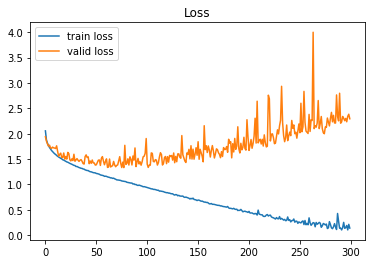

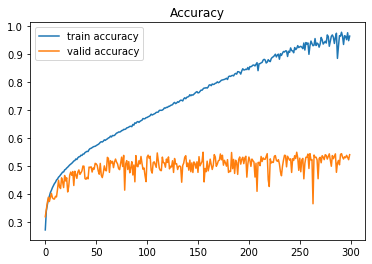

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()